<a href="https://colab.research.google.com/github/snsk/_sandbox/blob/main/keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 自動車の燃費を予測するモデル

古典的なAuto MPGデータセットを使用し、1970年代後半から1980年台初めの自動車の燃費を予測するモデルを構築します。この目的のため、モデルにはこの時期の多数の自動車の仕様を読み込ませます。仕様には、気筒数、排気量、馬力、重量などが含まれています。

MPG：燃費
Cylinders：気筒数
Displacement：排気量
Horsepower：馬力
Weight：重量
Acceleration：加速
Model Year：発売年
Origin：

In [ ]:
# ペアプロットのためseabornを使用します
!pip install -q seaborn

40960/30286 [========================================] - 0s 0us/step


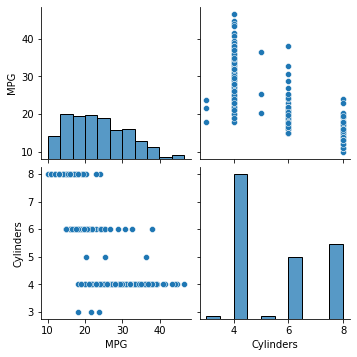

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#print(tf.__version__)

dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

dataset.isna().sum()
dataset = dataset.dropna()
origin = dataset.pop('Origin')

#origin をone-hot-coding に変換
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
sns.pairplot(train_dataset[["MPG", "Cylinders"]], diag_kind="hist")
